<a href="https://colab.research.google.com/github/chandramitadutta/chandramitadutta-Forecasting-Hotel-Booking-Fulfillment/blob/main/hotel_booking_cancellation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizing Hospitality: Forecasting Hotel Booking Fulfillment

**Scenario: What this project is about**

Picture yourself as the manager of a bustling hotel, where each day brings a whirlwind of activity—guests checking in, rooms being prepared, and reservations flooding in from around the world. Amidst this bustling environment, you're tasked with ensuring every reservation is seamlessly fulfilled, maximizing revenue while delivering exceptional guest experiences. However, with fluctuating demand and last-minute cancellations, staying ahead of the game can feel like navigating a maze blindfolded. That's where data science steps in, offering predictive modeling to illuminate the path forward.Accurately forecasting which reservations are likely to be fulfilled and which ones may be canceled enables hotels to optimize resource allocation and mitigate revenue loss associated with cancellations.

In this notebook, we will build some predictive models that can be used my hotelliers to predict if a booking will be fullfilled or not.

Dataset link: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [ ]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load dataframe

df = pd.read_csv('/content/drive/MyDrive/Kaggle Projects/Hotel Booking_models/Hotel Reservations.csv')
df.head(4)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled


Lets look at the basic structure of the data

In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
#Lets check if the data has null values

null_df = pd.DataFrame({'null_values' : df.isna().sum(), 'null_percentage': (df.isna().sum()/df.shape[0])*100})
null_df

,null_values,null_percentage
Booking_ID,0,0.0
no_of_adults,0,0.0
no_of_children,0,0.0
no_of_weekend_nights,0,0.0
no_of_week_nights,0,0.0
type_of_meal_plan,0,0.0
required_car_parking_space,0,0.0
room_type_reserved,0,0.0
lead_time,0,0.0
arrival_year,0,0.0


**Lets do some EDA!**

array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>],
       [<Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'avg_price_per_room'}>,
        <Axes: title={'center': 'no_of_special_requests'}>, <Axes: >,
        <Axes: >]], dtype=object)

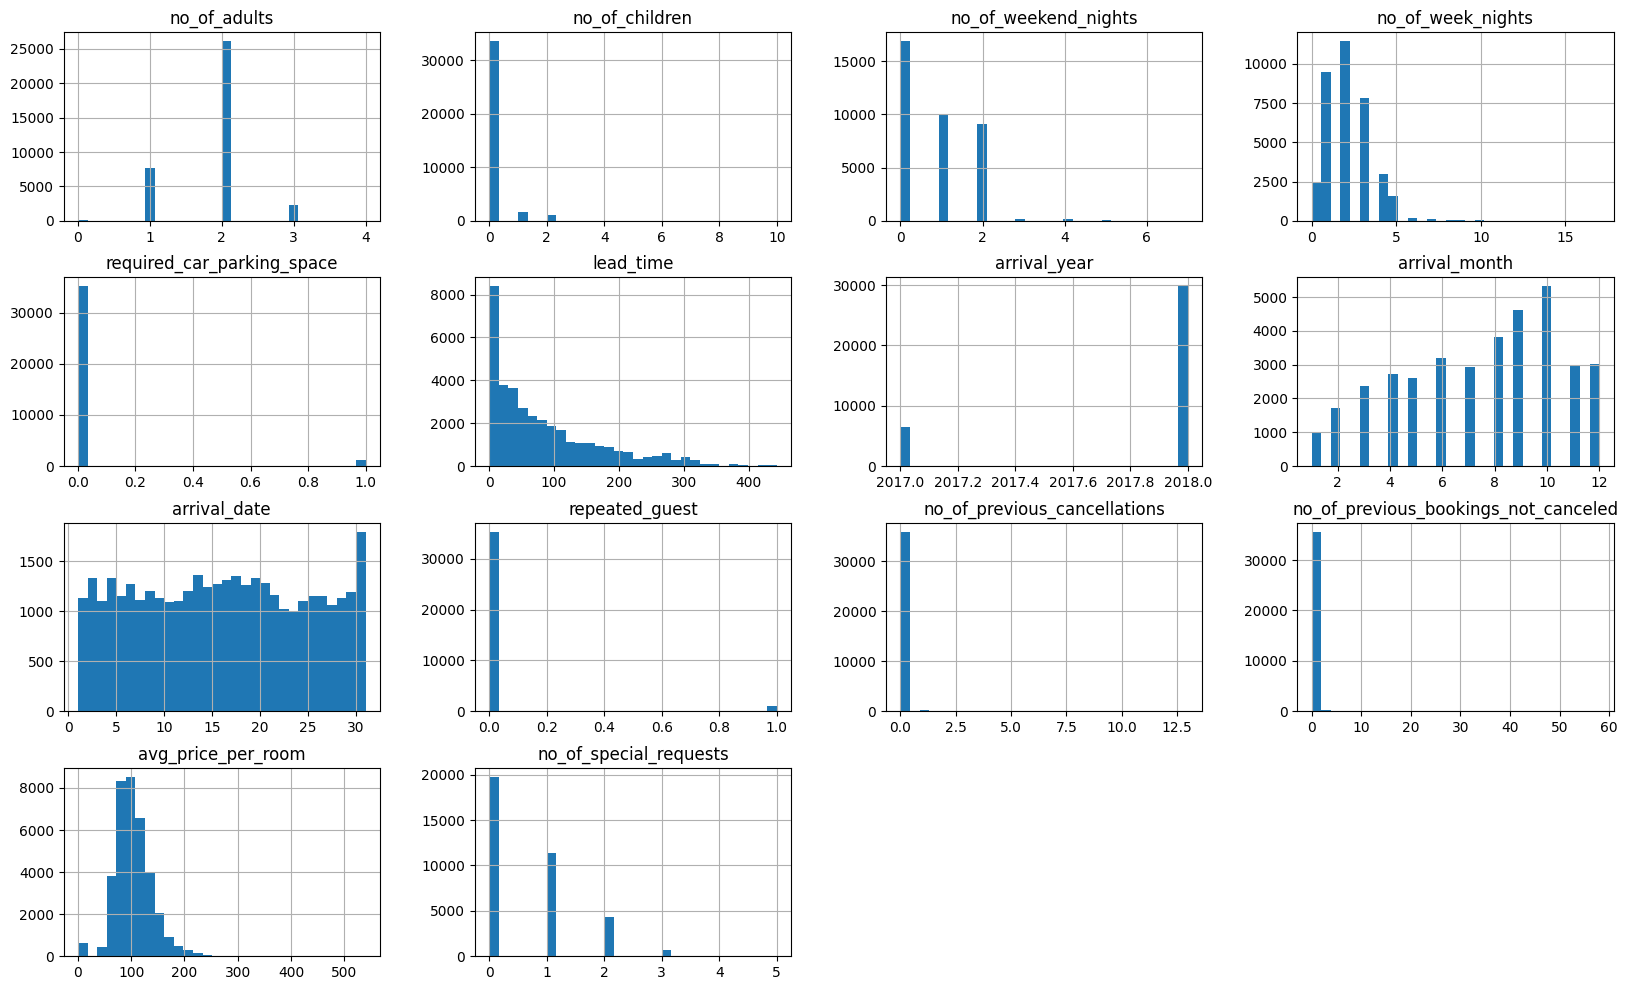

In [ ]:
#First lets visualise the data
#Histogram of all the numerical features

df.hist(bins=30, figsize=(20, 12))

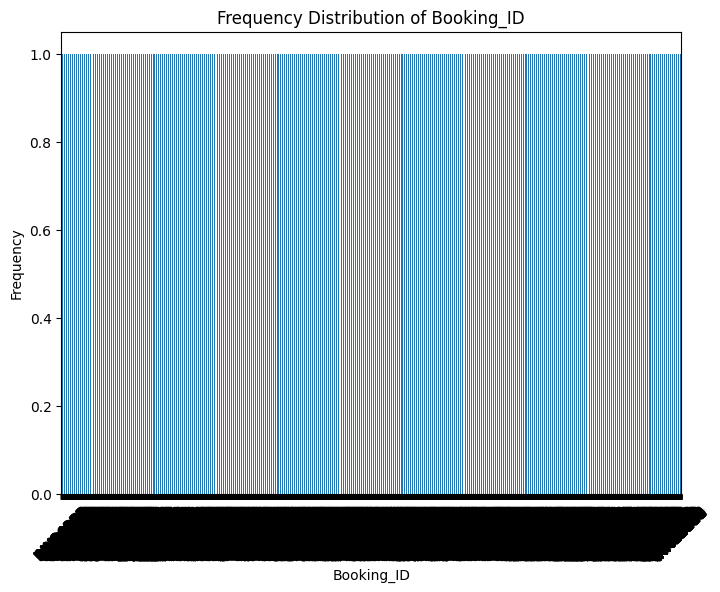

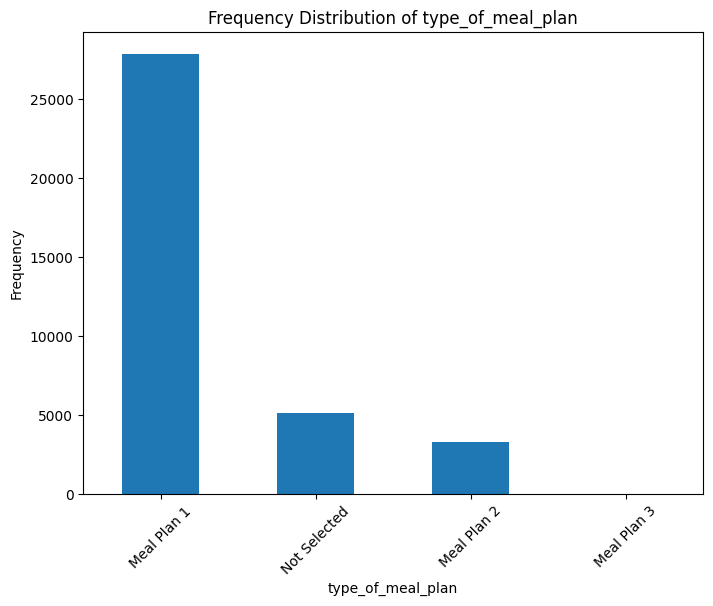

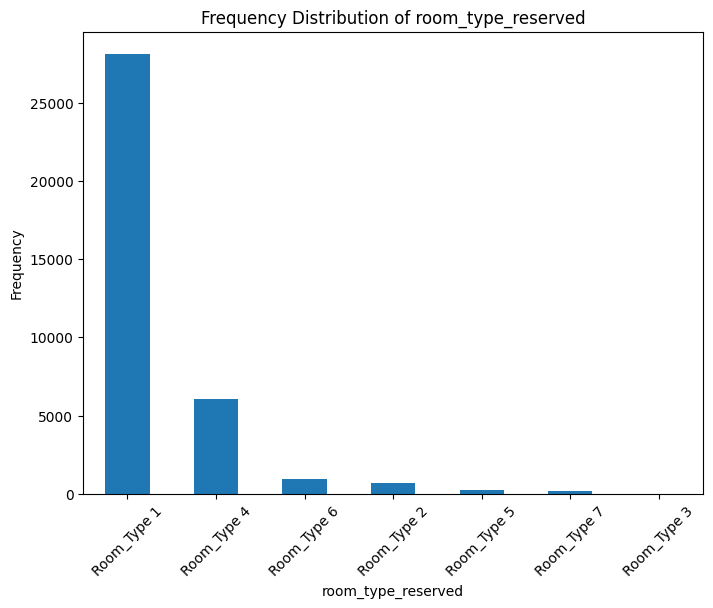

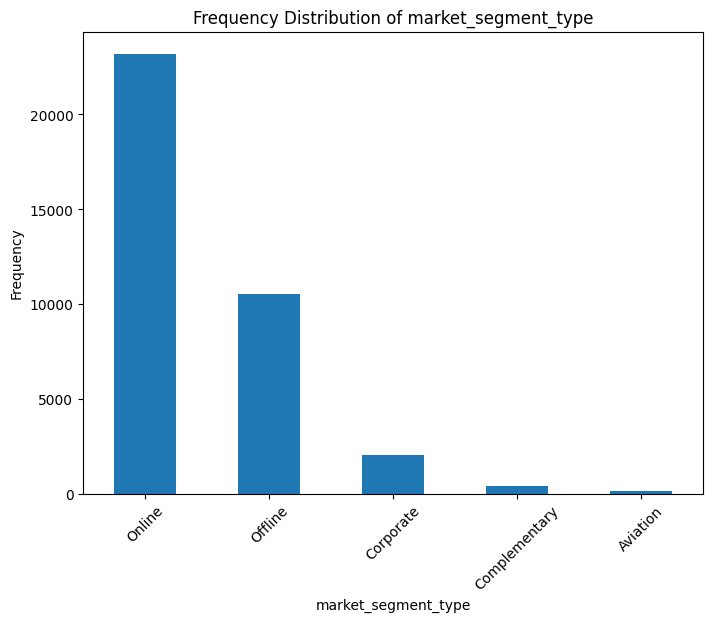

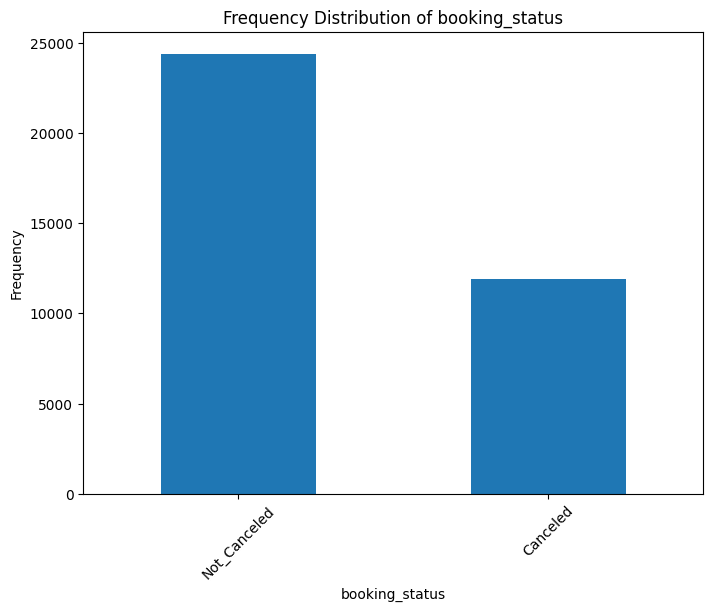

In [ ]:
#Bar plots of non numerical columns

for column in df.columns:
    # Check if the column is non-numerical (categorical)
    if df[column].dtype == 'object':
        # Visualize frequency distribution
        plt.figure(figsize=(8, 6))
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Frequency Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()

We can see that the target variable, booking_status is imbalanced. It has more values for not_canceled compared to canceled. This might bias the models.

In [ ]:
# The booking id is a unique identifier and not a relevant feature. Lets drop it.
df = df.drop(columns = ['Booking_ID'])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


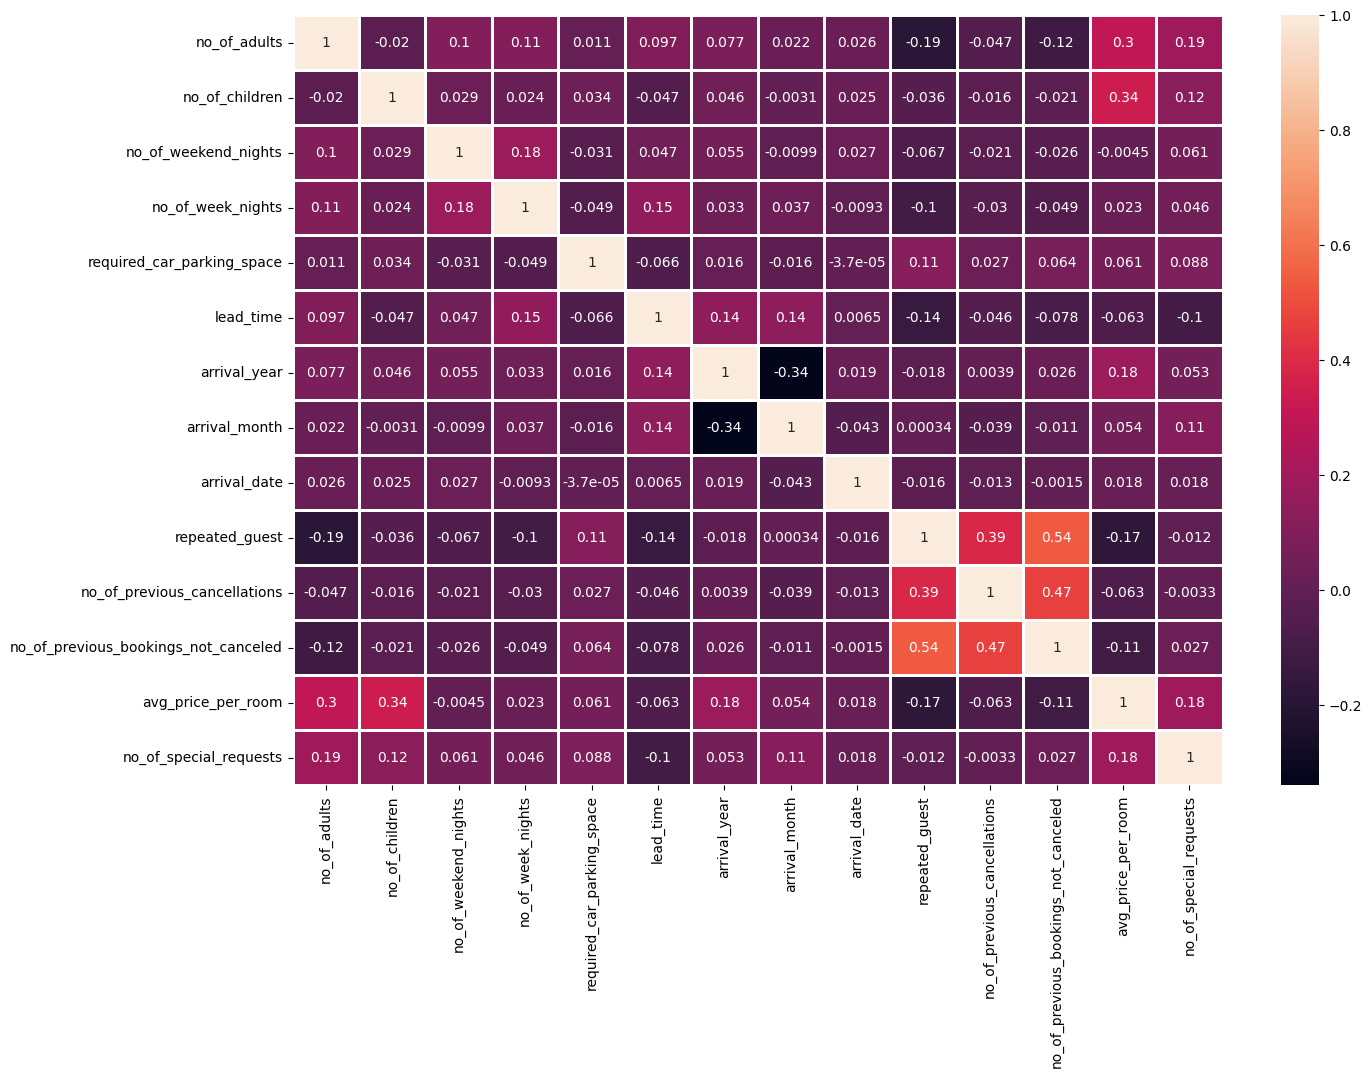

In [ ]:
#Next lets look at the correlations of the features

plt.figure(figsize = (15, 10))

numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

We do not have strong correlations among the varaibles. Only the variables - number of previous bookings not cancelled and repeated guests are moderately positively correlated. No other attributes have strong correlations.

In [ ]:
df1 = df.copy()
df1 = df1.drop(columns = ['booking_status'])

Lets scale our numerical columns and encode the categorical columns

In [ ]:
cols = list(df1.columns)
# define list of numerical predictors
cols_num = [col for col in cols if df1[col].dtype != 'O']
print(cols_num)
# define list of categorical predictors
cols_cat = [col for col in cols if df1[col].dtype == 'O']
print(cols_cat)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler is used for data normalization, squishing values to a range of 0 to 1.
#It helps ensure that all features contribute equally to the model’s prediction by preventing any single feature from dominating due to its larger scale.
scaler = MinMaxScaler()

scaler.fit(df1[cols_num])
df1[cols_num] = scaler.transform(df1[cols_num])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder transforms categorical variables into binary vectors, with each category represented as a binary feature,
# indicating its presence or absence.
encoder = OneHotEncoder(sparse_output=False, handle_unknown = 'ignore')
encoder.fit(df1[cols_cat])
encoded_col = list(encoder.get_feature_names_out(cols_cat))

df1[encoded_col] = encoder.transform(df1[cols_cat])

In [ ]:
df1 = df1.drop(cols_cat, axis = 1)

In [ ]:
df1.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.50,0.0,0.142857,0.117647,0.0,0.505643,0.0,0.818182,0.033333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.50,0.0,0.285714,0.176471,0.0,0.011287,1.0,0.909091,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.25,0.0,0.285714,0.058824,0.0,0.002257,1.0,0.090909,0.900000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#dropping the target variable

X = df1
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})
y = df['booking_status']

In [ ]:
X.shape, y.shape

((36275, 30), (36275,))

In [ ]:
X.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.5,0.0,0.142857,0.117647,0.0,0.505643,0.0,0.818182,0.033333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.5,0.0,0.285714,0.176471,0.0,0.011287,1.0,0.909091,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y.head(2)

0    0
1    0
Name: booking_status, dtype: int64

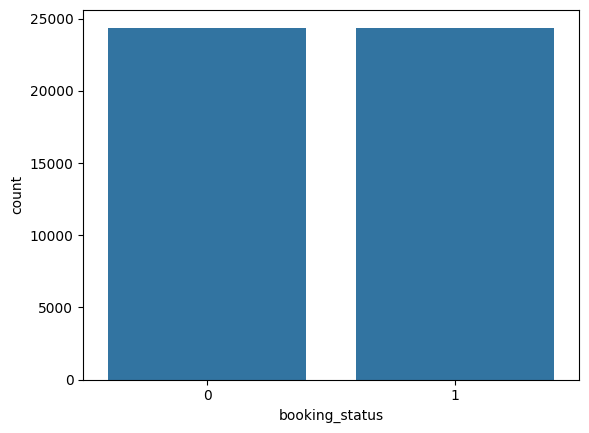

In [ ]:
# Earlier we saw that the target variable, booking_status is imbalanced. Accounting for imbalance in target variable using SMOTE.

from imblearn.over_sampling import SMOTE #or RandomOverSampler

smote = SMOTE(random_state = 42)

#fit target variable and predictors

x_smote, y_smote = smote.fit_resample(X, y)
ax = sns.countplot(x = y_smote)

In [ ]:
#Split df into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.1, random_state = 42)

Now we are ready to start building our models.


### Model 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(accuracy_lr)

conf = confusion_matrix(y_test, y_pred_lr)
print(conf)

clf_report = classification_report(y_test, y_pred_lr)
print(clf_report)

0.7710127101271013
[[1915  533]
 [ 584 1846]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2448
           1       0.78      0.76      0.77      2430

    accuracy                           0.77      4878
   macro avg       0.77      0.77      0.77      4878
weighted avg       0.77      0.77      0.77      4878



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7710127101271013

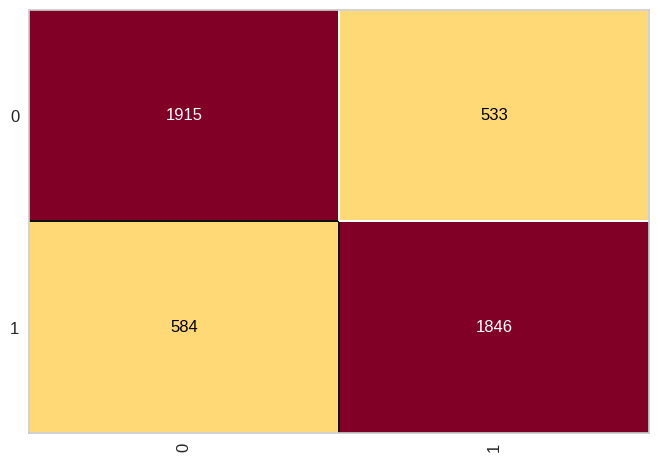

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(lr)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

The logistic regression model performed faily with 77% accuracy, but we could do better.

### Model 2: Decision Tree

For the tree based models we will perform hyperparameter tuning using GridSearchCV.

In [ ]:
#defining hyperparameters - lets apply gridsearchcv(checks combo of every possible hyperparameter)
min_split = np.array([2, 3, 4, 5, 6, 7])
max_dep = np.array([3, 4, 5, 6, 7, 9, 11])
algo = ['entropy', 'gini']
#parameter grid
values_grid = {'min_samples_split': min_split, 'max_depth': max_dep, 'criterion': algo}

#DT classifier
dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(estimator = dt, param_grid = values_grid, cv = 5)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [ ]:
print('Min Samples Split: ', grid_dt.best_estimator_.min_samples_split)
print('Max Depth: ', grid_dt.best_estimator_.max_depth)
print('Algorithm: ', grid_dt.best_estimator_.criterion)
print('Score: ', grid_dt.best_score_)

Min Samples Split:  3
Max Depth:  11
Algorithm:  gini
Score:  0.8667258698696891


In [ ]:
#running the dt

dt_model = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 3, max_depth= 11, random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"DT accuracy is:{acc_dt}")

conf = confusion_matrix(y_test, y_pred_dt)
print(conf)

clf_report = classification_report(y_test, y_pred_dt)
print(clf_report)

DT accuracy is:0.8589585895858959
[[2136  312]
 [ 376 2054]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2448
           1       0.87      0.85      0.86      2430

    accuracy                           0.86      4878
   macro avg       0.86      0.86      0.86      4878
weighted avg       0.86      0.86      0.86      4878



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8589585895858959

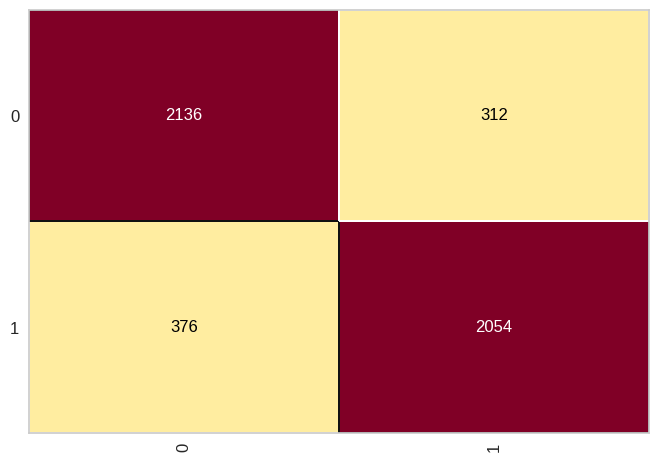

In [ ]:
cm = ConfusionMatrix(dt_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Decision Tree model did better than logistic regression, with accuracy at 85%.

**What are the most important features for our model?**

In [ ]:
columns = df1.columns

feature_imp = pd.Series(dt_model.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

lead_time                               0.393314
no_of_special_requests                  0.149033
market_segment_type_Online              0.147910
avg_price_per_room                      0.084912
arrival_month                           0.074728
no_of_weekend_nights                    0.030590
no_of_adults                            0.029595
arrival_date                            0.020912
no_of_week_nights                       0.017347
arrival_year                            0.012725
required_car_parking_space              0.012541
market_segment_type_Offline             0.011532
type_of_meal_plan_Meal Plan 1           0.004062
type_of_meal_plan_Meal Plan 2           0.002641
market_segment_type_Corporate           0.002182
type_of_meal_plan_Not Selected          0.001774
room_type_reserved_Room_Type 1          0.001133
room_type_reserved_Room_Type 4          0.000915
room_type_reserved_Room_Type 5          0.000825
no_of_children                          0.000578
repeated_guest      

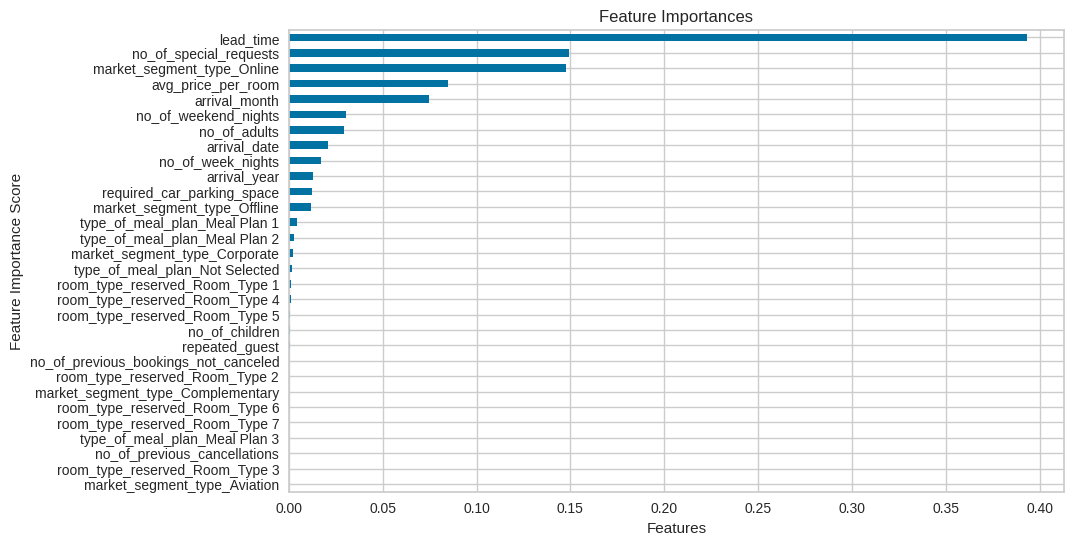

In [ ]:
plt.figure(figsize=(10, 6))
feature_imp.sort_values(ascending = True).plot(kind='barh')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importances')
plt.show()

Lead time is the most important feature. Only around 13 features have significant importance values, compared to the rest.

### Model 3: Random Forest : Ensemble method

In [ ]:
#gridsearchcv before RF
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([100]) #no of trees
algo = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_dep = np.array([3, 4, 5, 6, 7, 9, 11])
#parameter grid
values_grid = {'n_estimators': n_estimators, 'min_samples_split': min_split, 'max_depth': max_dep, 'criterion': algo}

rf = RandomForestClassifier()
grid_rf = GridSearchCV(estimator = rf, param_grid = values_grid, cv = 5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([100])})

In [ ]:
print('Algorithm: ', grid_rf.best_estimator_.criterion)
print('Score: ', grid_rf.best_score_)
print('Min Split: ', grid_rf.best_estimator_.min_samples_split)
print('Max Depth: ', grid_rf.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.8714637163123216
Min Split:  7
Max Depth:  11


In [ ]:
#Run RF

rf_model = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth= 11,  criterion = 'gini', random_state = 0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"RF accuracy is:{acc_rf}")

conf = confusion_matrix(y_test, y_pred_rf)
print(conf)

clf_report = classification_report(y_test, y_pred_rf)
print(clf_report)

RF accuracy is:0.8706437064370643
[[2235  213]
 [ 418 2012]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      2448
           1       0.90      0.83      0.86      2430

    accuracy                           0.87      4878
   macro avg       0.87      0.87      0.87      4878
weighted avg       0.87      0.87      0.87      4878



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8706437064370643

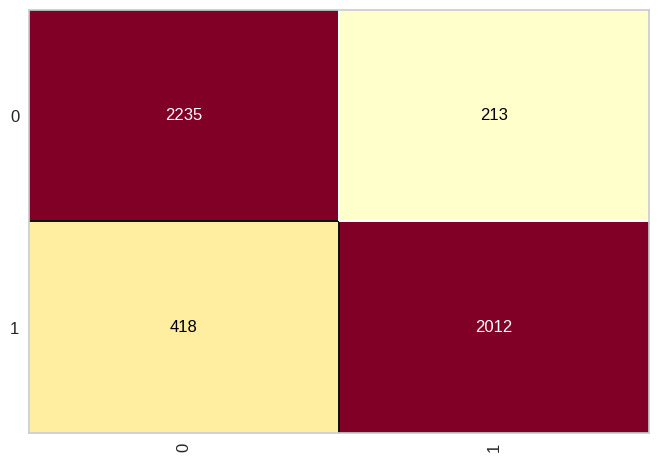

In [ ]:
cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

The ensemble method, Random Forest was futher able to improve accuracy up to 87%.

In [ ]:
feature_imp_rf = pd.Series(rf_model.feature_importances_, index = columns).sort_values(ascending = False).head(10)
feature_imp_rf

lead_time                      0.337973
no_of_special_requests         0.175194
avg_price_per_room             0.097712
arrival_month                  0.071492
market_segment_type_Online     0.050007
arrival_year                   0.046802
no_of_week_nights              0.040586
market_segment_type_Offline    0.034660
arrival_date                   0.028543
no_of_weekend_nights           0.024926
dtype: float64

Text(0.5, 1.0, 'Top 10 features')

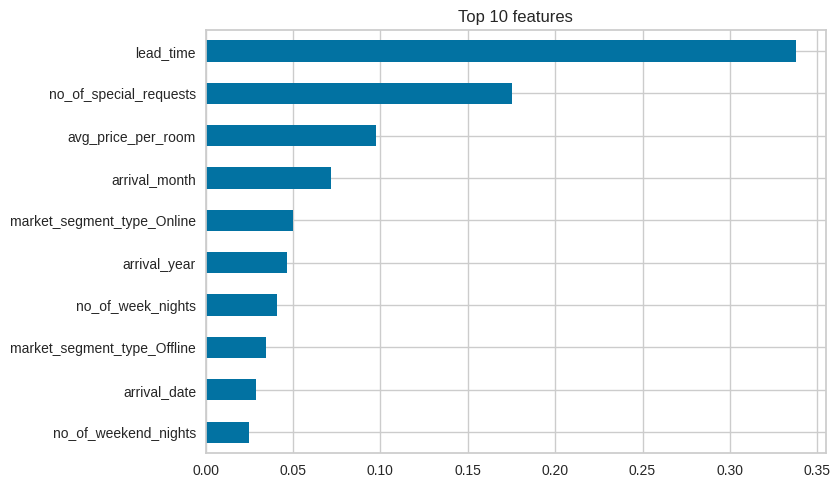

In [ ]:
feature_imp_rf.sort_values(ascending = True).plot(kind = 'barh')
plt.title('Top 10 features')

### Model 4: Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = np.array([100])
algo = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': algo}

model = ExtraTreesClassifier()
gridExtraTrees = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridExtraTrees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [ ]:
print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)

Algorithm:  entropy
Score:  0.9217573872351753


In [ ]:
#running extra trees

extra_trees = ExtraTreesClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
extra_trees.fit(X_train, y_train)
y_pred_et = extra_trees.predict(X_test)

In [ ]:
acc_et = accuracy_score(y_test, y_pred_et)

print(f"ET accuracy is:{acc_et}")

ET accuracy is:0.9266092660926609


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


0.9266092660926609

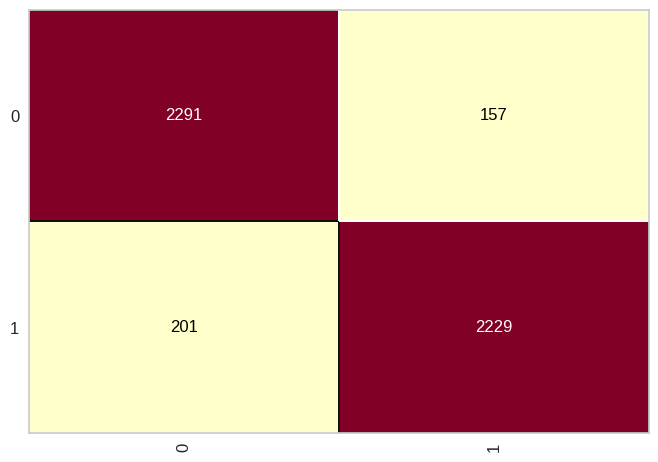

In [ ]:
cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

The Extra Trees Classifier gave us the best accuracy, at 92%, and from the confusion matrix we can see that it is able to predict both results quite well.

Lets see what are the top 10 features for this model.

In [ ]:
feature_imp_et = pd.Series(extra_trees.feature_importances_, index = columns).sort_values(ascending = False).head(10)
feature_imp_et

lead_time                     0.255841
avg_price_per_room            0.118998
no_of_special_requests        0.116300
arrival_month                 0.106295
arrival_date                  0.101305
no_of_week_nights             0.077013
no_of_weekend_nights          0.057059
no_of_adults                  0.034541
arrival_year                  0.027979
market_segment_type_Online    0.017551
dtype: float64

Text(0.5, 1.0, 'Top 10 features')

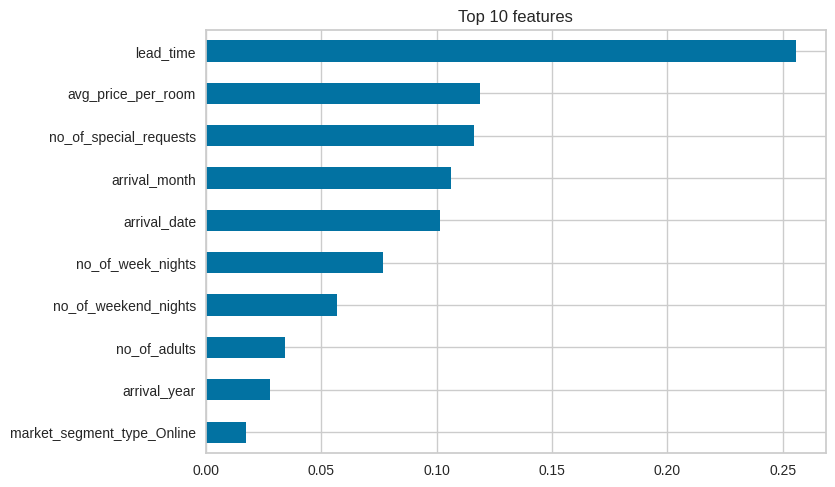

In [ ]:
feature_imp_et.sort_values(ascending = True).plot(kind = 'barh')
plt.title('Top 10 features')

Hence, this Extra Trees model could be used by the hotel management, to predict whether a booking would be honored or cancelled with around 92% accuracy, and was able to predict both results pretty well. We also know that features like lead time are important features that contribute to this prediction.